In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics  #to include metrics for evaluation # this used to be cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/AI Assignment2/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Analyze if there is non-numeric data in the 'TotalCharges' column since it's showing as an object instead of float64.
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors = 'coerce')
dataset.loc[dataset['TotalCharges'].isna()==True] #Returning columns with NaN values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# Above we see that the blank "TotalCharges" happen when customers have 0 months tenure so we will change those values to $0.
# This will also change the dtype of total charges to float
dataset[dataset['TotalCharges'].isna()==True] = 0
dataset['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service', 0], dtype=object)

In [ ]:
# Here I am now converting each categorical value to numeric value excluding the customer id since obviously it has no effect to customer churn
# Since I need to plot the heatmap all values must be numeric too
dataset['gender'].replace(['Male','Female'],[0,1],inplace=True)
dataset['Partner'].replace(['Yes','No'],[1,0],inplace=True)
dataset['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
dataset['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
dataset['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
dataset['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
dataset['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
dataset['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
dataset['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
dataset['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
dataset['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
dataset['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
dataset['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
dataset['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
dataset['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
dataset['Churn'].replace(['Yes','No'],[1,0],inplace=True)
 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


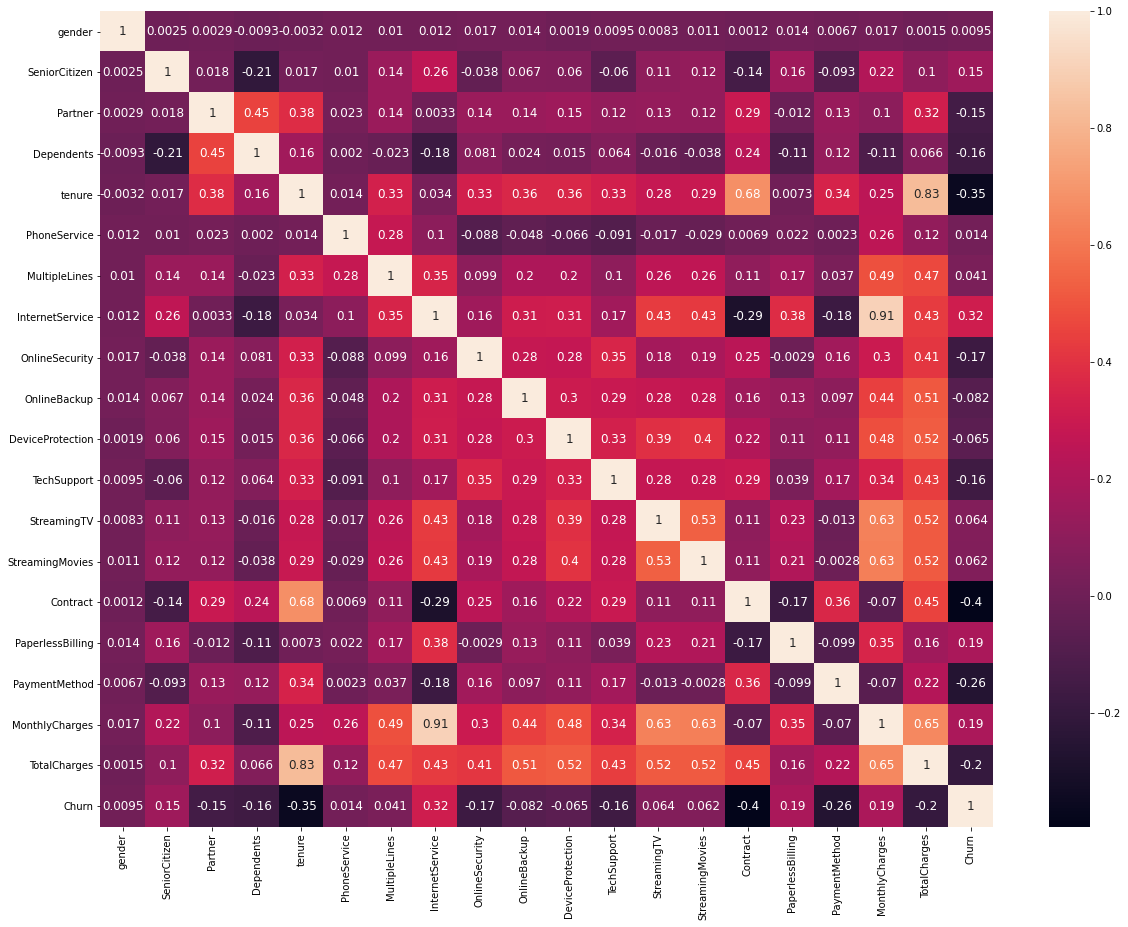

In [ ]:
# Plotting the correlation heatmap to check for correlation of each variable to the other
corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
# Dropping all the variables with negative correlation to Churn 
# Since 'customerid' column does not provide any relevant information in predicting the customer churn, we can delete the column too.
dataset=dataset.drop(['customerID','Partner', 'Dependents',
       'tenure','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract','PaymentMethod',
       'TotalCharges'], axis=1)

In [ ]:
dataset.head()

,gender,SeniorCitizen,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
0,1,0,0,0,1,0,0,1,29.85,0
1,0,0,1,0,1,0,0,0,56.95,0
2,0,0,1,0,1,0,0,1,53.85,1
3,0,0,0,0,1,0,0,0,42.30,0
4,1,0,1,0,2,0,0,1,70.70,1


In [ ]:
# Now checking the remaining variables with +ve correlation to churn 
dataset.columns.values

array(['gender', 'SeniorCitizen', 'PhoneService', 'MultipleLines',
       'InternetService', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'], dtype=object)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   MultipleLines     7043 non-null   int64  
 4   InternetService   7043 non-null   int64  
 5   StreamingTV       7043 non-null   int64  
 6   StreamingMovies   7043 non-null   int64  
 7   PaperlessBilling  7043 non-null   int64  
 8   MonthlyCharges    7043 non-null   float64
 9   Churn             7043 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 550.4 KB


In [ ]:
dataset.head()

,gender,SeniorCitizen,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
0,1,0,0,0,1,0,0,1,29.85,0
1,0,0,1,0,1,0,0,0,56.95,0
2,0,0,1,0,1,0,0,1,53.85,1
3,0,0,0,0,1,0,0,0,42.30,0
4,1,0,1,0,2,0,0,1,70.70,1


In [ ]:
# Encoding the remaining categorical columns only
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
gender_encoded = encoder.fit_transform(dataset['gender']) # [Male or Female]
PhoneService_encoded = encoder.fit_transform(dataset['PhoneService']) #[Yes or No]
MultipleLines_encoded = encoder.fit_transform(dataset['MultipleLines']) #['No phone service','No', 'Yes']
InternetService_encoded = encoder.fit_transform(dataset['InternetService']) #['No','DSL','Fiber optic']
StreamingTV_encoded = encoder.fit_transform(dataset['StreamingTV']) #['No','Yes','No internet service']
StreamingMovies_encoded = encoder.fit_transform(dataset['StreamingMovies']) #['No','Yes','No internet service']
PaperlessBilling_encoded = encoder.fit_transform(dataset['PaperlessBilling']) #['Yes','No']
Churn_encoded = encoder.fit_transform(dataset['Churn'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   MultipleLines     7043 non-null   int64  
 4   InternetService   7043 non-null   int64  
 5   StreamingTV       7043 non-null   int64  
 6   StreamingMovies   7043 non-null   int64  
 7   PaperlessBilling  7043 non-null   int64  
 8   MonthlyCharges    7043 non-null   float64
 9   Churn             7043 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 550.4 KB


In [ ]:
dataset

,gender,SeniorCitizen,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
0,1,0,0,0,1,0,0,1,29.85,0
1,0,0,1,0,1,0,0,0,56.95,0
2,0,0,1,0,1,0,0,1,53.85,1
3,0,0,0,0,1,0,0,0,42.30,0
4,1,0,1,0,2,0,0,1,70.70,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,1,1,84.80,0
7039,1,0,1,1,2,1,1,1,103.20,0
7040,1,0,0,0,1,0,0,1,29.60,0
7041,0,1,1,1,2,0,0,1,74.40,1


In [ ]:
# Now just making sure the data is encoded
InternetService_encoded

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
# Checking the dimension for onehot
InternetService_encoded.ndim

2

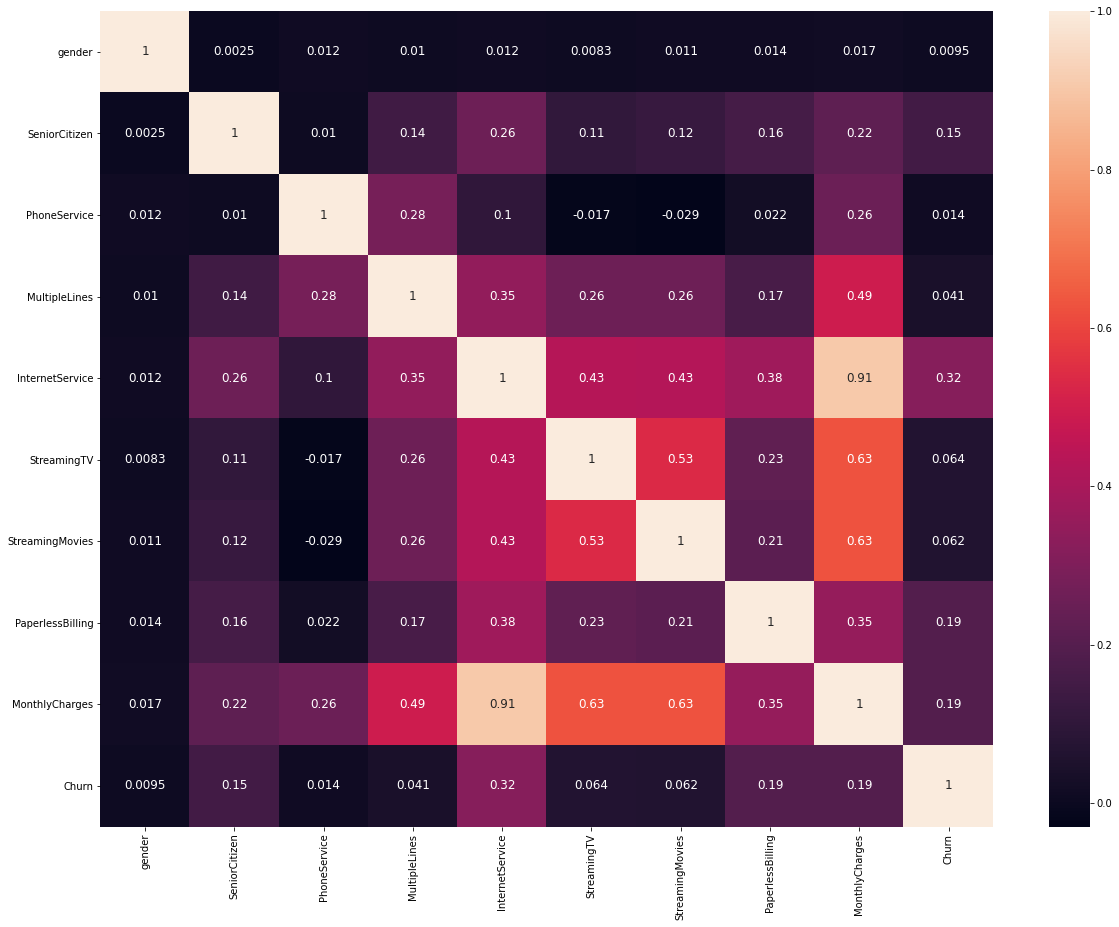

In [ ]:
# Now drawing the correlation heatmap of the selected remaining variables excluding those with -ve correlation
corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

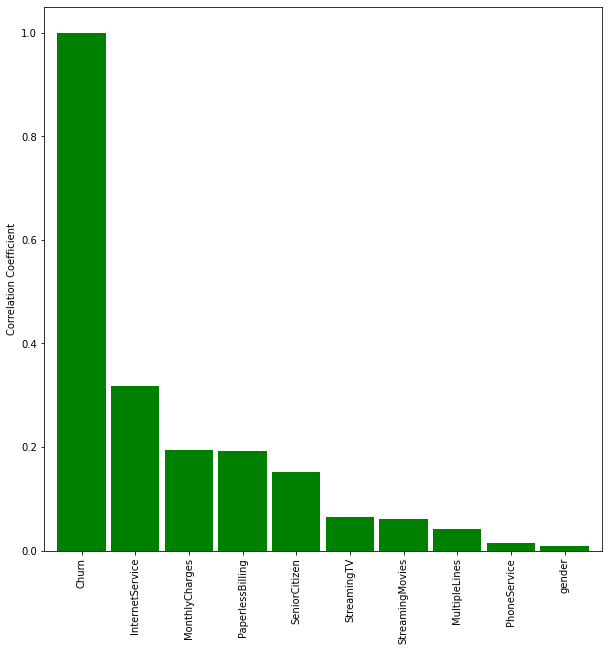

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
plt.ylabel('Correlation Coefficient')
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',    # Plot a bar chart
        width=0.9,      # Set bar width as 75% of space available
        figsize=(10,10),  # Set size of plot in inches
        color='green'
                                                           )

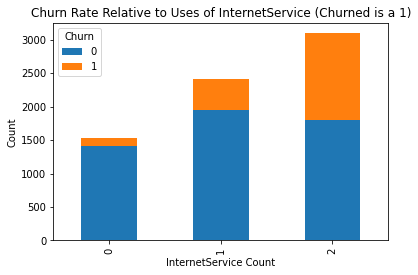

In [ ]:
# Explore the relationship between instances of InternetService and Churn. 
# Stacked Bar of InternetService and Churn.
InternetService_churn = pd.crosstab(dataset['InternetService'], dataset['Churn'])
InternetService_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('InternetService Count')
plt.title('Churn Rate Relative to Uses of InternetService (Churned is a 1)')
plt.show()

<Figure size 1440x1800 with 0 Axes>

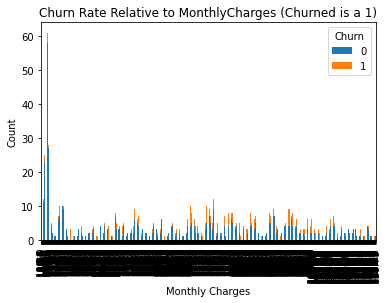

In [ ]:
# Churn rate relative to MonthlyCharges
# Stacked bar of MonthlyCharges and churn.
fig = plt.figure(figsize=(20,25))
InternetService_churn = pd.crosstab(dataset['MonthlyCharges'], dataset['Churn'])
InternetService_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Monthly Charges')
plt.title('Churn Rate Relative to MonthlyCharges (Churned is a 1)')
plt.show()

<Figure size 1440x1800 with 0 Axes>

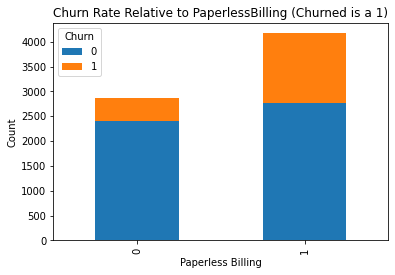

In [ ]:
# Churn rate relative to PaperlessBilling
# Stacked bar of PaperlessBilling and churn.
fig = plt.figure(figsize=(20,25))
PaperlessBilling_churn = pd.crosstab(dataset['PaperlessBilling'], dataset['Churn'])
PaperlessBilling_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Paperless Billing')
plt.title('Churn Rate Relative to PaperlessBilling (Churned is a 1)')
plt.show()

<Figure size 1440x1800 with 0 Axes>

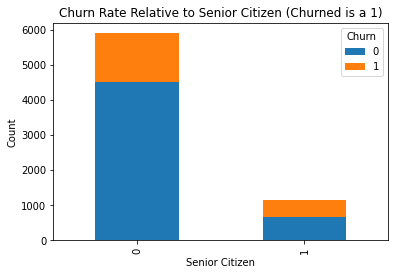

In [ ]:
# Churn rate relative to SeniorCitizen
# Stacked bar of SeniorCitizen and churn.
fig = plt.figure(figsize=(20,25))
SeniorCitizen_churn = pd.crosstab(dataset['SeniorCitizen'], dataset['Churn'])
SeniorCitizen_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Senior Citizen')
plt.title('Churn Rate Relative to Senior Citizen (Churned is a 1)')
plt.show()

<Figure size 1440x1800 with 0 Axes>

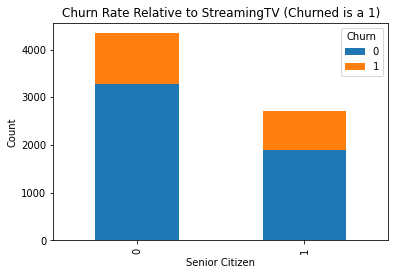

In [ ]:
# Churn rate relative to StreamingTV
# Stacked bar of StreamingTV and churn.
fig = plt.figure(figsize=(20,25))
StreamingTV_churn = pd.crosstab(dataset['StreamingTV'], dataset['Churn'])
StreamingTV_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Senior Citizen')
plt.title('Churn Rate Relative to StreamingTV (Churned is a 1)')
plt.show()

<Figure size 1440x1800 with 0 Axes>

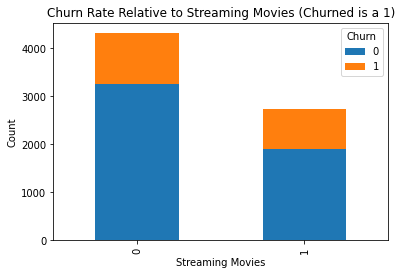

In [ ]:
# Churn rate relative to StreamingMovies
# Stacked bar of StreamingMovies and churn.
fig = plt.figure(figsize=(20,25))
StreamingTV_churn = pd.crosstab(dataset['StreamingMovies'], dataset['Churn'])
StreamingTV_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Streaming Movies')
plt.title('Churn Rate Relative to Streaming Movies (Churned is a 1)')
plt.show()

<Figure size 1440x1800 with 0 Axes>

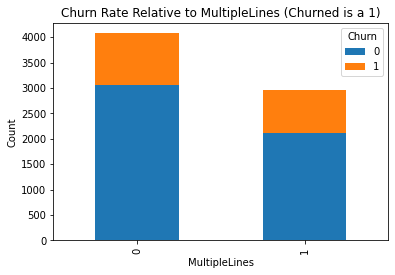

In [ ]:
# Churn rate relative to MultipleLines
# Stacked bar of MultipleLines and churn.
fig = plt.figure(figsize=(20,25))
StreamingTV_churn = pd.crosstab(dataset['MultipleLines'], dataset['Churn'])
StreamingTV_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('MultipleLines')
plt.title('Churn Rate Relative to MultipleLines (Churned is a 1)')
plt.show()

<Figure size 1440x1800 with 0 Axes>

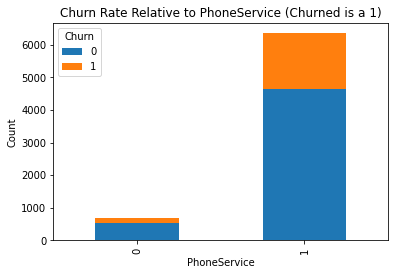

In [ ]:
# Churn rate relative to PhoneService
# Stacked bar of PhoneService and churn.
fig = plt.figure(figsize=(20,25))
StreamingTV_churn = pd.crosstab(dataset['PhoneService'], dataset['Churn'])
StreamingTV_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('PhoneService')
plt.title('Churn Rate Relative to PhoneService (Churned is a 1)')
plt.show()

<Figure size 1440x1800 with 0 Axes>

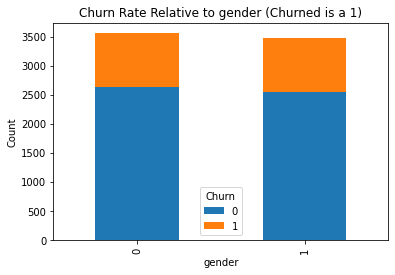

In [ ]:
# Churn rate relative to gender
# Stacked bar of gender and churn.
fig = plt.figure(figsize=(20,25))
StreamingTV_churn = pd.crosstab(dataset['gender'], dataset['Churn'])
StreamingTV_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('gender')
plt.title('Churn Rate Relative to gender (Churned is a 1)')
plt.show()

In [ ]:
# Feature Scaling of Monthly Charges column and Senior Citizen so that the model will be able to understand the different scales of numerical values
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
dataset['MonthlyCharges_scaled'] = scaler.fit_transform(dataset['MonthlyCharges'].values.reshape(-1,1)) # reshaping so that I will keep the decimal price unrounded
dataset['SeniorCitizen_scaled'] = scaler.fit_transform(dataset['SeniorCitizen'].values.reshape(-1,1))

In [ ]:
dataset[8:]

,gender,SeniorCitizen,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,MonthlyCharges_scaled,SeniorCitizen_scaled
8,1,0,1,1,2,1,1,1,104.80,1,0.882526,0.0
9,0,0,1,0,1,0,0,0,56.15,0,0.472842,0.0
10,0,0,1,0,1,0,0,1,49.95,0,0.420632,0.0
11,0,0,1,0,0,0,0,0,18.95,0,0.159579,0.0
12,0,0,1,1,2,1,1,0,100.35,0,0.845053,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,1,1,84.80,0,0.714105,0.0
7039,1,0,1,1,2,1,1,1,103.20,0,0.869053,0.0
7040,1,0,0,0,1,0,0,1,29.60,0,0.249263,0.0
7041,0,1,1,1,2,0,0,1,74.40,1,0.626526,1.0


In [ ]:
# Now dropping the unscaled numerical columns so that we will be left a dataset with scaled numerical columns
dataset=dataset.drop(['MonthlyCharges','SeniorCitizen'], axis=1)

In [ ]:
dataset

,gender,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies,PaperlessBilling,Churn,MonthlyCharges_scaled,SeniorCitizen_scaled
0,1,0,0,1,0,0,1,0,0.251368,0.0
1,0,1,0,1,0,0,0,0,0.479579,0.0
2,0,1,0,1,0,0,1,1,0.453474,0.0
3,0,0,0,1,0,0,0,0,0.356211,0.0
4,1,1,0,2,0,0,1,1,0.595368,0.0
...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,1,1,0,0.714105,0.0
7039,1,1,1,2,1,1,1,0,0.869053,0.0
7040,1,0,0,1,0,0,1,0,0.249263,0.0
7041,0,1,1,2,0,0,1,1,0.626526,1.0


In [ ]:
dataset.columns.values

array(['gender', 'PhoneService', 'MultipleLines', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn',
       'MonthlyCharges_scaled', 'SeniorCitizen_scaled'], dtype=object)

In [ ]:
# Selecting X_train, X_test, Y_train, Y_test
# More data must must be allocated to the training set and less data for testing
# (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Churn',axis=1), 
                                                    dataset['Churn'], test_size=0.20, 
                                                    random_state=35)

In [ ]:
# Concatinating the 2 training sets
train_data=pd.concat([X_train,y_train],axis=1)

In [ ]:
X_train.shape

(5634, 9)

In [ ]:
X_test.shape

(1409, 9)

In [ ]:
y_train.shape

(5634,)

In [ ]:
y_test.shape

(1409,)

In [ ]:
!pip install xgboost

In [ ]:
# Function to estimate the best value of n_estimators and fit the model with the given data.
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        #to get the parameters of xgboost
        xgb_param = alg.get_xgb_params() 
        
        #to convert into a datastructure internally used by xgboost for training efficiency 
        # and speed
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        
        #xgb.cv is used to find the number of estimators required for the parameters 
        # which are set
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                        metrics='auc', early_stopping_rounds=early_stopping_rounds)
        
        #setting the n_estimators parameter using set_params
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print(alg.get_xgb_params())
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Churn'],eval_metric='auc')
    
    return alg

In [ ]:
# Defining a function that I will need to get the accuracy value
def get_accuracy(alg,predictors):
    dtrain_predictions = alg.predict(X_test[predictors])
    dtrain_predprob = alg.predict_proba(X_test[predictors])[:,1] #Prediction probability
    print ("\nModel Report")
    print ("Accuracy : %.4g" % (metrics.accuracy_score(y_test.values,dtrain_predictions)*100))
    print ("AUC Score (Train): %f" % (metrics.roc_auc_score(y_test.values,dtrain_predprob)*100))

In [ ]:
# Defining a function that I will need to get the feature importances based on xgboost using fscore
def get_feature(alg):
    #to get the feature importances based on xgboost we use fscore
    feat_imp = pd.Series(alg._Booster.get_fscore()).sort_values(ascending=False)
    print(feat_imp)
    
    #this shows the feature importances on a bar chart
    feat_imp.plot(kind='bar', color='orange', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
target = 'Churn' #Chrun which is the target variable(Dependent variable)

In [ ]:
# Model selection, predictions and metrics
def XgbClass(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
             gamma=0,subsample=0.8,colsample_bytree=0.8):
    xgb1 = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         min_child_weight=min_child_weight,
                         gamma=gamma,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree)
    return xgb1

In [ ]:
# These are the initial parameters before tuning.
def drop_features(l):
    return [x for x in train_data.columns if x not in l]

In [ ]:
#First Prediction: Use of initial parameters and without feature engineering
from xgboost import XGBClassifier
import xgboost as xgb1

In [ ]:
predictors = drop_features(target)
xgb1=XgbClass()
mymodel=modelfit(xgb1, train_data, predictors) # Inputing the train data(X_train and y_train) and predictors
xgb1.fit(train_data[predictors],train_data['Churn'])

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 33, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=33, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
# Calling the get accuracy function
get_accuracy(mymodel,predictors)


Model Report
Accuracy : 77.86
AUC Score (Train): 77.966916


In [ ]:
# Accuracy is the proportion of true positives and negatives in the whole data set. It determines if a value is accurate compare it to the accepted value; the nearness of a calculation to the true value.

# AUC (area under the ROC receiver operating characteristic curve) measures how true positive rate (recall) and false positive rate trade off, so in that sense it is already measuring something else

MonthlyCharges_scaled    388
StreamingMovies           68
PaperlessBilling          61
InternetService           60
SeniorCitizen_scaled      48
gender                    47
StreamingTV               46
MultipleLines             41
PhoneService              22
dtype: int64


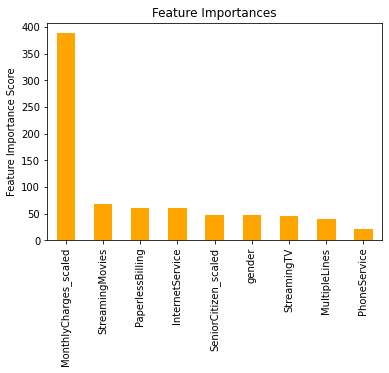

In [ ]:
# Plotting feature importances
get_feature(mymodel)

In [ ]:
# From the above plot I can see that all features have +ve feature importance score and they are the ones 
# I selected in item(i) of the question

In [ ]:
get_accuracy(mymodel,predictors)


Model Report
Accuracy : 77.86
AUC Score (Train): 77.966916


Tuning


In [ ]:
param_test1 = {
 'max_depth':list(range(5,10,1)),
 'min_child_weight':list(range(5,10,1))
}
gsearch1 = GridSearchCV(estimator=XgbClass(n_estimators=48),param_grid =param_test1,
                        scoring='roc_auc',n_jobs=-1,iid=False, cv=5, verbose=3)
gsearch1.fit(train_data[predictors],train_data[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

# If the best parameters are edge values then we do 
# GridSearchCV by taking one less and one value more than the best parameters.

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   19.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([0.23892779, 0.23305435, 0.23716741, 0.23501716, 0.23917851,
         0.27415962, 0.27053032, 0.27375035, 0.27182832, 0.27656903,
         0.31245561, 0.3029417 , 0.29889822, 0.29705329, 0.29721732,
         0.33940721, 0.34034457, 0.33478379, 0.32643023, 0.32728896,
         0.36178384, 0.35821042, 0.3516541 , 0.35588131, 0.33261509]),
  'mean_score_time': array([0.00978689, 0.00933261, 0.00730977, 0.00789351, 0.00736823,
         0.00804515, 0.00795684, 0.00796518, 0.00798306, 0.00808835,
         0.00973673, 0.01025505, 0.00910001, 0.00990644, 0.0097743 ,
         0.00905733, 0.0089623 , 0.00894923, 0.00924635, 0.00891356,
         0.00948067, 0.00930629, 0.00916638, 0.00970221, 0.0085587 ]),
  'mean_test_score': array([0.76648702, 0.76754275, 0.76839371, 0.76802092, 0.76850178,
         0.76483272, 0.76532183, 0.76627856, 0.76627651, 0.76652117,
         0.76238647, 0.7635445 , 0.76374963, 0.76462227, 0.76468243,
         0.76077788, 0.76246613, 0.76213553,

In [ ]:
param_test2 = {
 'max_depth':[6,7,8,9],
 'min_child_weight':[2,3,4,5]
}
gsearch2 = GridSearchCV(estimator=XgbClass(n_estimators=48),param_grid =param_test2,scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch2.fit(train_data[predictors],train_data[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([0.27173223, 0.2756772 , 0.27203403, 0.27192326, 0.31115465,
         0.30887222, 0.30503392, 0.30526357, 0.34104123, 0.33543363,
         0.33811202, 0.33804584, 0.37273226, 0.36697321, 0.36628623,
         0.35759916]),
  'mean_score_time': array([0.0096879 , 0.00805669, 0.00807319, 0.00796576, 0.00868878,
         0.00862041, 0.00850329, 0.00860085, 0.00913639, 0.01038523,
         0.00912962, 0.00890937, 0.00992212, 0.00938563, 0.00963726,
         0.00988364]),
  'mean_test_score': array([0.76262908, 0.7623408 , 0.76429152, 0.76483272, 0.75894043,
         0.75990358, 0.7621566 , 0.76238647, 0.75596033, 0.7582091 ,
         0.75931218, 0.76077788, 0.75134514, 0.75491434, 0.75850843,
         0.7594443 ]),
  'param_max_depth': masked_array(data=[6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False, False, False, False, False],
         fi

In [ ]:
xgb1 = XgbClass(max_depth=8,min_child_weight=4)
mymodel=modelfit(xgb1, train_data, predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 4, 'missing': None, 'n_estimators': 35, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


In [ ]:
get_accuracy(mymodel,predictors)


Model Report
Accuracy : 77.43
AUC Score (Train): 78.008163


In [ ]:
# To tune Gamma

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,8)]
}
gsearch3=GridSearchCV(estimator=XgbClass(n_estimators=48,max_depth=7,min_child_weight=5),
                      param_grid =param_test3,scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch3.fit(train_data[predictors],train_data[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([0.29987512, 0.31065488, 0.30752363, 0.30893273, 0.31821184,
         0.30704012, 0.30423899, 0.30404973]),
  'mean_score_time': array([0.00912519, 0.00935359, 0.00984173, 0.00897021, 0.00853853,
         0.00911303, 0.00991607, 0.00804505]),
  'mean_test_score': array([0.76238647, 0.76224618, 0.76192693, 0.76286401, 0.76284821,
         0.76297925, 0.76322808, 0.76341607]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4},
   {'gamma': 0.5},
   {'gamma': 0.6},
   {'gamma': 0.7}],
  'rank_test_score': array([6, 7, 8, 4, 5, 3, 2, 1], dtype=int32),
  'split0_test_score': array([0.75608133, 0.75853145, 0.7576781 , 0.75929486, 0.7608117 ,
         0.75814175, 0.75908302, 0.75752422]),
  'split1_test_score'

In [ ]:
xgb1 = XgbClass(max_depth=7,min_child_weight=5,gamma=0)
mymodel=modelfit(xgb1, train_data, predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 5, 'missing': None, 'n_estimators': 35, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


In [ ]:
get_accuracy(mymodel,predictors)


Model Report
Accuracy : 78.35
AUC Score (Train): 78.235698


In [ ]:
# Saving the model

In [ ]:
import joblib

In [ ]:
filename = "test_model"
joblib.dump(mymodel,filename)

['test_model']

In [ ]:
mymodel = joblib.load(filename)
mymodel.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
pred_result = mymodel.predict(X_test)
print(pred_result)

[0 0 0 ... 0 0 1]
